#        Initiation à IBM Cloud service par PhD-Christophe Burgaud
_______________________________________________________________________________________________

Ce TP s'inscrit dans le cadre de la prise en main de IBM Cloud, il s'articule autour de :

**- _Analyse des données :_** Cette partie concerne la description des données, l'analyse des correration et le traitement des données manquantes et des données aberrantes.


**- _Classification des véhicules :_** Il s'agira de mettre en oeuvre divers méthodes de classification (Arbre de classification, Random forest, Regression logistique, Xgboost, ...) et d'analyser les principaux résultats obtenus.


**- _Reproductibilité :_** Nous vérifions ici la reproductibilité des données. L'idée est de verifier dans quel mésure le modèle est capable de reproduire les données qui ont servi à son élaboration. Dans ce cas précis, il s'agira de vérifier si le modèle est capable de prédire si un véhicule est performant ou pas en fonction des caractéristiques du véhicule.


____________________________________
## Importation des données avec Pandas
____________________________________

Les données de cette études sont issues du fichier **_EMGrenoble_CarPerformance_Data.csv_** 

In [1]:

import pandas as pd

df_data = pd.read_csv('./EMGrenoble_CarPerformance_Data.csv')


___________________________________________________________________
## **_1. ANALYSE ET TRAITEMENT DES DONNEES_**
___________________________________________________________________

Cette artie est consacrée à la desciption, au traitement et à l'analyse des corrélations entre les variables.


_________________________________________
###  1.1. Description de la base de données 
_________________________________________

In [2]:
df_data.head()

,mpg,cylinders,engine,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,American,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,American,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,American,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,American,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,American,ford torino


In [3]:
df_data.describe()

,mpg,cylinders,engine,horsepower,weight,acceleration,year
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704,75.921182
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359,3.748737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000,73.000000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


__________________
La méthode _**describe**_ permet de fournir une description sommaire du dataframe. Elle nous fournit les Caractéristiques de tendance et les caractéristiques de dispersion pour les variables quantitatives. 

- Il y a 406 observations dans notre dataframe.


- Les variables _**mpg**_ et _**horsepower**_ Présentent des valeurs manquantes.


- La variable mpg a une moyenne de 23.51 mais la médiane quant à elle est de 23 (Cela implique que la distribution des mpg est légèrement étalée à gauche).


- On remarque aussi que la variable _**year**_ correspond à l'année de mise en service (il faudra donc un traitement pour correspondre à l'âge des véhicules).


    

________________________________
### 1.2. Analyse des corrélations entres les variables
_________________________________

In [4]:
df_data.corr()

,mpg,cylinders,engine,horsepower,weight,acceleration,year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.951787,0.844158,0.895220,-0.522452,-0.360762
engine,-0.804203,0.951787,1.000000,0.898326,0.932475,-0.557984,-0.381714
horsepower,-0.778427,0.844158,0.898326,1.000000,0.866586,-0.697124,-0.424419
weight,-0.831741,0.895220,0.932475,0.866586,1.000000,-0.430086,-0.315389
acceleration,0.420289,-0.522452,-0.557984,-0.697124,-0.430086,1.000000,0.301992
year,0.579267,-0.360762,-0.381714,-0.424419,-0.315389,0.301992,1.000000


L'analyse de cette matrice de corrélation laisse paraître:

- La variable _**mpg**_ est fortement et négativement liée à la variable _**horsepower**_, _**weight**_ et _**engine**_.


- Elle est aussi corrélée mais positivement à la variable _**accélération**_.


- En passant de la date de mise en circulation à l'âge réel, on aura une corrélation négative entre le _**mpg**_ et _**year**_ (l'âge du véhicule).

Ces corrélations identifiées seront mise à profit pour le traitement des valeurs manquantes.

________________________________
### 1.3. Traitement des valeurs manquantes
_________________________________

Les valeurs manquantes concernent uniquement les variables _**mpg**_ et _**horsepower**_. Sur la base des corrélations mises en relief plus haut, nous ferons des imputations en se plaçant dans des sous-groupe plus ou moins homogène vis-à-vis d'une ou deux variables assez corrélées à la variable presentant des données manquantes. 

In [5]:
df_data.loc[(df_data['mpg'].isnull())|
            (df_data['horsepower'].isnull())]

,mpg,cylinders,engine,horsepower,weight,acceleration,year,origin,name
10,NaN,8,350.0,165.0,4142,11.5,70,American,chevrolet chevelle concours (sw)
11,NaN,8,351.0,153.0,4034,11.0,70,American,ford torino (sw)
12,NaN,8,383.0,175.0,4166,10.5,70,American,plymouth satellite (sw)
13,NaN,8,360.0,175.0,3850,11.0,70,American,amc rebel sst (sw)
16,NaN,8,302.0,140.0,3353,8.0,70,American,ford mustang boss 302
28,25.0,4,98.0,NaN,2046,19.0,71,American,ford pinto
95,21.0,6,200.0,NaN,2875,17.0,74,American,ford maverick
220,23.6,4,140.0,NaN,2905,14.3,80,American,ford mustang cobra
241,23.0,4,151.0,NaN,3035,20.5,82,American,amc concord dl
254,NaN,4,133.0,115.0,3090,17.5,70,European,citroen ds-21 pallas


_**mpg**_ étant fortement corrélée à _**horsepower**_ et à _**engine**_, nous utilisons ces dernières pour définir des classes homogènes pour l'imputation des valeurs manquantes de la variable _**mpg**_.

Pour chacune des variables(weight et engine), nous divisons la population en quatre classes dont les bornes sont définies  par le _**min**_, le _**max**_ et les trois  _**quartiles**_ (Q1, Q2, Q3).

In [6]:
# Traitement des valeurs manquantes de mpg

var1 = 'horsepower'
var2 = 'engine'

cible = 'mpg'

var1_q = [df_data[var1].quantile(0), df_data[var1].quantile(.25), df_data[var1].quantile(.50), df_data[var1].quantile(.75), df_data[var1].quantile(1)]

var2_q = [df_data[var2].quantile(0), df_data[var2].quantile(.25), df_data[var2].quantile(.50), df_data[var2].quantile(.75), df_data[var2].quantile(1)]

for i in range(4):
    for j in range(4):
        df_data.loc[(var1_q[i] <= df_data[var1]) &
                    (df_data[var1] < var1_q[i + 1]) &
                    (var2_q[j] <= df_data[var2]) &
                    (df_data[var2] < var2_q[j + 1]) &
                    (df_data[cible].isnull()), cible] = df_data.loc[(var1_q[i] <= df_data[var1]) &
                                                                    (df_data[var1] < var1_q[i + 1]) &
                                                                    (var2_q[j] <= df_data[var2]) &
                                                                    (df_data[var2] < var2_q[j + 1]), cible].mean()


________________________
Pour le traitement de la variable _**horsepower**_, nous procédons comme précédemment en considérant les variables _**weight**_ et _**mpg**_ 

In [7]:
# Traitement des valeurs manquantes de horsepower

var1 = 'weight'
var2 = 'mpg'

cible = 'horsepower'

var1_q = [df_data[var1].quantile(0), df_data[var1].quantile(.25), df_data[var1].quantile(.50), df_data[var1].quantile(.75), df_data[var1].quantile(1)]

var2_q = [df_data[var2].quantile(0), df_data[var2].quantile(.25), df_data[var2].quantile(.50), df_data[var2].quantile(.75), df_data[var2].quantile(1)]

for i in range(4):
    for j in range(4):
        df_data.loc[(var1_q[i] <= df_data[var1]) &
                    (df_data[var1] < var1_q[i + 1]) &
                    (var2_q[j] <= df_data[var2]) &
                    (df_data[var2] < var2_q[j + 1]) &
                    (df_data[cible].isnull()), cible] = df_data.loc[(var1_q[i] <= df_data[var1]) &
                                                                    (df_data[var1] < var1_q[i + 1]) &
                                                                    (var2_q[j] <= df_data[var2]) &
                                                                    (df_data[var2] < var2_q[j + 1]), cible].mean()

________________________________
##### - Vérification des imputations
_________________________________

In [8]:
df_data.loc[(df_data['mpg'].isnull())|
            (df_data['horsepower'].isnull())]

,mpg,cylinders,engine,horsepower,weight,acceleration,year,origin,name


Notre dataframe ne contient plu de valeurs manquantes. Nous continuons avec l'analyse des variables.

________________________________
### 1.4. Création de la variable performance et traitement de l'âge des véhicules
_________________________________

Ici, on génère une nouvelle variable _**performance**_ en fonction de la valeur du mpg associé.

Aussi, nous transformons la variable _**year**_ pour que celle-ci corresponde à l'âge (qu'aurait le véhicule en 2020).

In [9]:
df_data['performance'] = df_data.apply(lambda x: "Performant" if x['mpg'] > 23 else "Non performant", axis = 1)

df_data['year'] = 120 - df_data['year']

_______________________
Après ces différentes manipulations, nous sauvegardons la base avec les dernières modifications.

In [10]:
df_data.to_csv('df-data-clean.csv', index = False)

#Chargement de la base traitée
df_data_clean = pd.read_csv('df-data-clean.csv')

________________________________
### 1.5. Analyse de la distribution des variables en fonction de la cible
_________________________________

Dans cette partie de l'analyse, nous croisons les variables deux à deux pour analyser l'évolution conjointe de celles-ci et en fonction de la variable cible (_**performance**_)

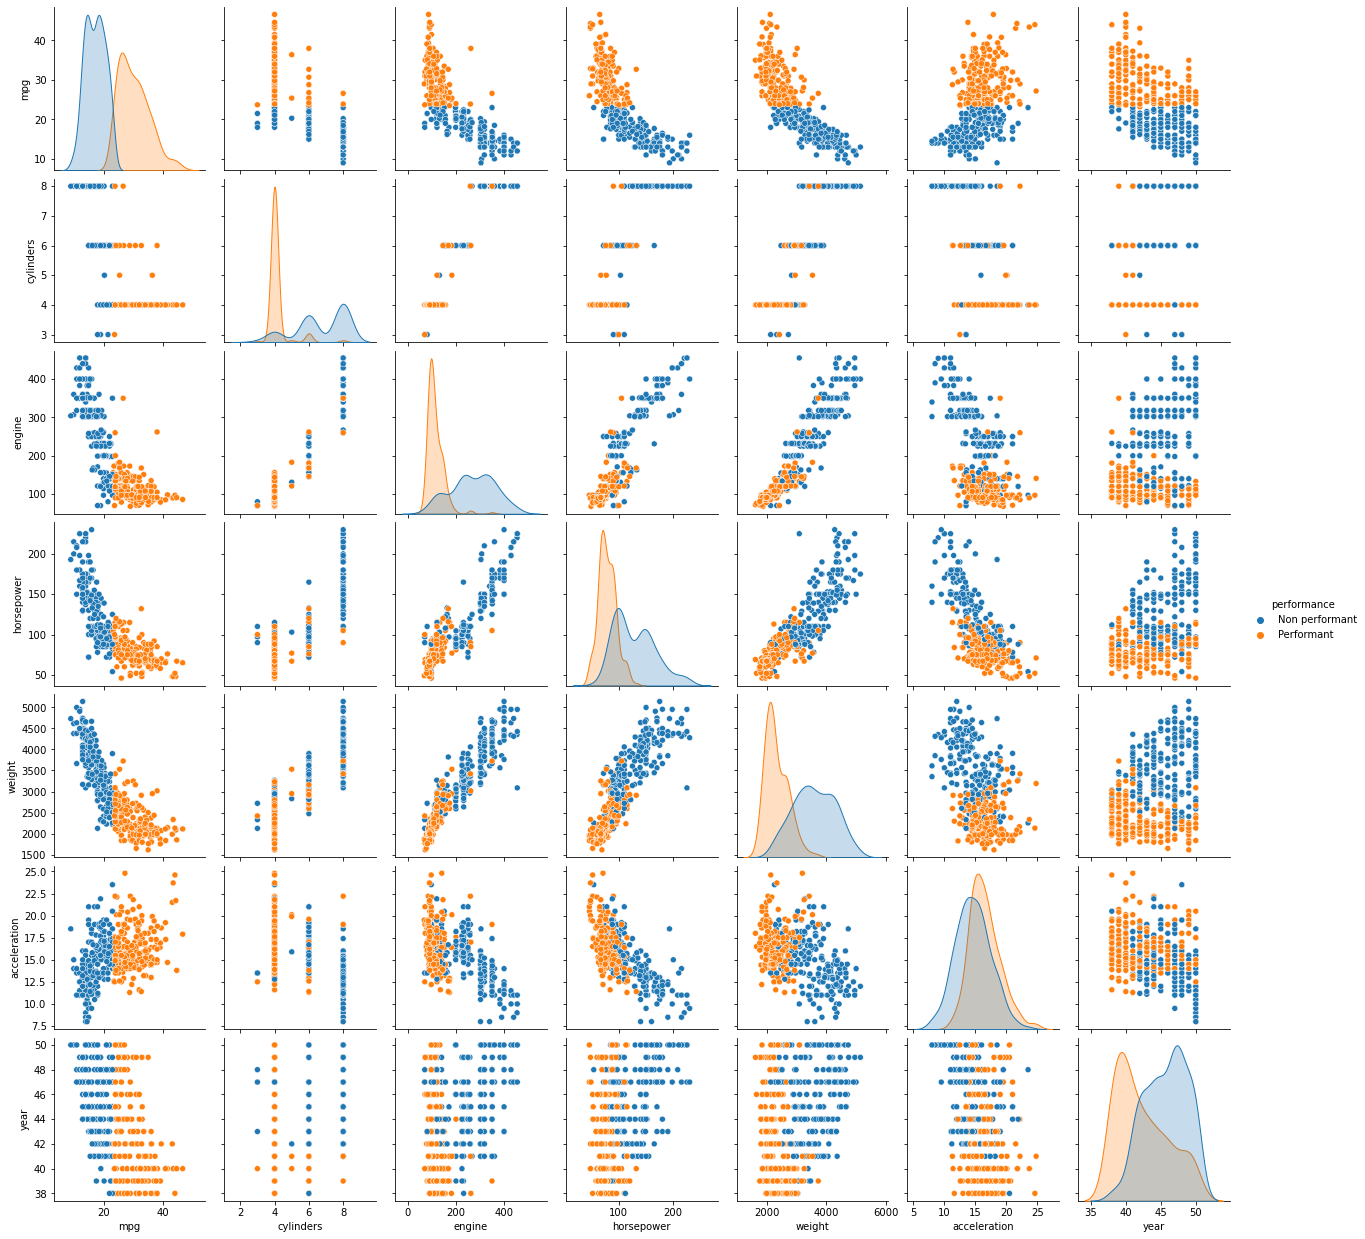

In [11]:
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

sb.pairplot(df_data_clean, hue = 'performance') ;

___________________________
Nous formulons ces assertions afin de verifier certaines impressions qui nous sembles.

In [12]:
assert len(df_data_clean['performance'].unique()) == 2

assert df_data_clean.loc[df_data_clean['performance'] == 'Performant', 'cylinders'].min() >= 3

assert len(df_data_clean.loc[(df_data_clean['mpg'].isnull()) | (df_data_clean['horsepower'].isnull())]) == 0

________________________________
### 1.6. Analyse de la dispersion des variables en fonction de la cible
_________________________________

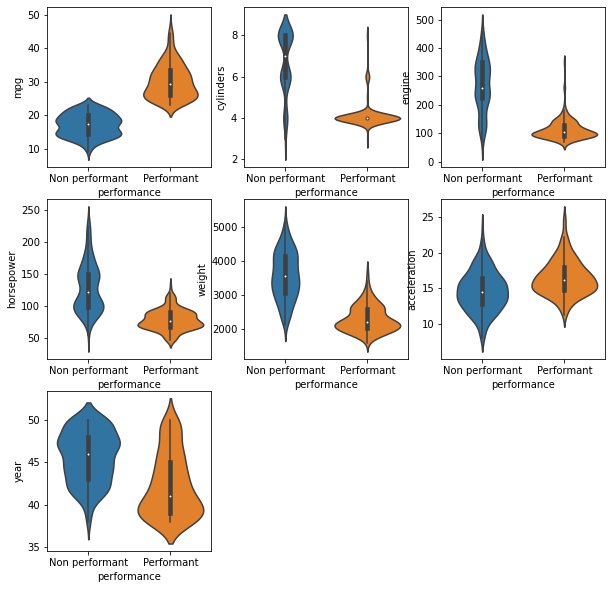

In [13]:
plt.figure(figsize = (10, 10))

for column_index, column in enumerate(df_data_clean.columns):
    if column == 'performance' or column == 'origin' or column == 'name':
        continue
    plt.subplot(3, 3, column_index + 1)
    sb.violinplot(x = 'performance', y = column, data = df_data_clean)

________________________________
Lien entre l'origine des véhicules et la variable cible _**mpg**_
_________________________________

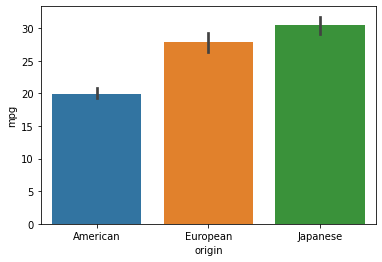

In [14]:
ax = sb.barplot(x = 'origin', y = 'mpg', data = df_data_clean)

Il ne semble pas y avoir une différence significative dans la repartition des véhicules en fonction de leur origine.

Après cette partie descriptive, la suite de l'analyse sera sur la classification des véhicules.

___________________________________________________________________
## **_2. CLASSIFICATION DES VEHICULES SELON LA PERFORMANCE_**
___________________________________________________________________



Nous passerons différents algorithmes de classification sur nos données et analyserons les résultats qui en découleront.

Nous verrons successivement les arbres et feront varier certains paramètres pour analyser les résultats.

________________________________
### 2.1. Préparation des données
_________________________________

Nous allons définir les variables exogènes (_**features**_) et la variable endogène (_**cible**_) dans le cadre de cette modélisation.

Ensuite, nous allons découper les observations en échantillon d'apprentissage (_**train**_) et en échantillon test.

In [15]:
# Définition des variables explicatives et de la variables expliquée (la performance)
features = df_data_clean[['cylinders', 'engine', 'horsepower', 'weight', 'acceleration', 'year']].values
perform = df_data_clean['performance'].values



In [16]:
# Définition des échantillons d'apprentissage et de validation

from sklearn.model_selection import train_test_split

(training_features,
 testing_features,
 training_perform,
 testing_perform) = train_test_split(features, perform, test_size = 0.25, random_state = 1)

________________________________
### 2.2. L'arbre de classification
_________________________________



In [17]:
from sklearn.tree import DecisionTreeClassifier

# Définition de l'arbre
decision_tree_classifier = DecisionTreeClassifier()

# Apprentissage de l'arbre
decision_tree_classifier.fit(training_features, training_perform)

# Test de l'arbre appris 
decision_tree_classifier.score(testing_features, testing_perform)

0.9019607843137255

________________________________
#### 2.2.1 Tuning de l'arbre de classification
_________________________________

Le résultat obtenu ci-dessus peut varié d'un échantillon à un autre. 

Nous utiliserons la méthode bootstrap pour introduire une variabilité en tirant un grand nombre de fois et cela afin d'obtenir des résultats robustes

Min. model accuracy 77.04918032786885
Max. model accuracy 98.36065573770492


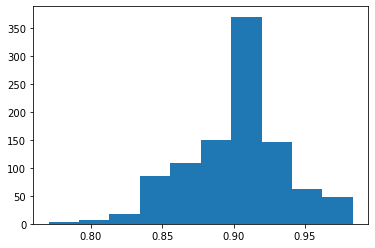

In [18]:
model_accuracies = []

for repetition in range(1000):
    (training_features,
     testing_features,
     training_perform,
     testing_perform) = train_test_split(features, perform, test_size = 0.15)
    
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_features, training_perform)
    classifier_accuracy = decision_tree_classifier.score(testing_features, testing_perform)
    model_accuracies.append(classifier_accuracy)
    
print("Min. model accuracy",min(model_accuracies)*100)
print("Max. model accuracy",max(model_accuracies)*100)
plt.hist(model_accuracies);

Les Scores obtenus sont relativement élevés. En effet, le score moyen tourne autour de _**.90**_ 

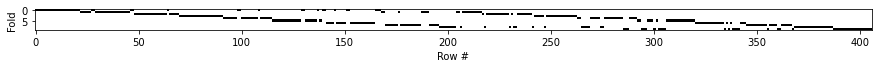

In [19]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

def plot_cv(cv, features, labels):
    masks = []
    for train, test in cv.split(features, labels):
        mask = np.zeros(len(labels), dtype=bool)
        mask[test] = 1
        masks.append(mask)
    
    plt.figure(figsize=(15, 15))
    plt.imshow(masks, interpolation='none', cmap='gray_r')
    plt.ylabel('Fold')
    plt.xlabel('Row #')

plot_cv(StratifiedKFold(n_splits=10), features, perform)

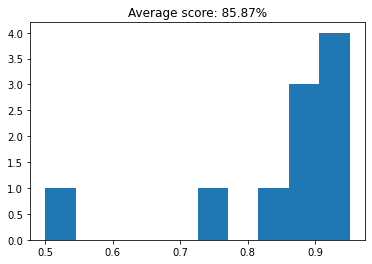

In [20]:
from sklearn.model_selection import cross_val_score

tree_classifier = DecisionTreeClassifier()

# cross_val_score returns a list of the scores, which we can visualize to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(decision_tree_classifier, features, perform, cv = 10)
plt.hist(cv_scores)
plt.title('Average score: {}%'.format(round(100*np.mean(cv_scores),2))) ;

_______________________
Ici, nous jouerons sur les paramètres pour chercher les meilleurs configurations

In [21]:
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4, 5, 6]}

cross_validation = StratifiedKFold(n_splits = 10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid = parameter_grid,
                           cv = cross_validation)

grid_search.fit(features, perform)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.8960365853658535
Best parameters: {'max_depth': 1, 'max_features': 5}


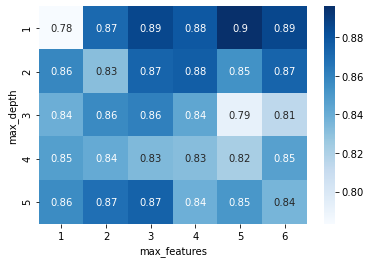

In [22]:
grid_visualization = grid_search.cv_results_['mean_test_score']

grid_visualization.shape = (5, 6)
sb.heatmap(grid_visualization, cmap='Blues', annot=True)
plt.xticks(np.arange(6) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['max_depth'])
plt.xlabel('max_features')
plt.ylabel('max_depth') ;

In [23]:
decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4, 5, 6]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid = parameter_grid,
                           cv = cross_validation)

grid_search.fit(features, perform)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.8985365853658536
Best parameters: {'criterion': 'gini', 'max_depth': 1, 'max_features': 3, 'splitter': 'best'}


In [24]:
best_tree_classifier = grid_search.best_estimator_
best_tree_classifier

DecisionTreeClassifier(max_depth=1, max_features=3)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


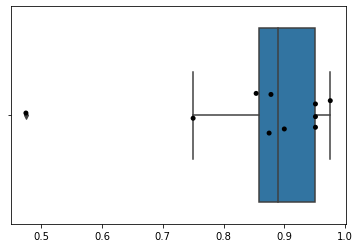

In [25]:
dt_scores = cross_val_score(tree_classifier, features, perform, cv = 10)

sb.boxplot(dt_scores)
sb.stripplot(dt_scores, jitter = True, color = 'black') ;

________________________________
### 2.3. Random forest
_________________________________

Nous utilisons ici l'algorithme du _**random forest**_ afin de définir un ensembre d'arbres qui permettrons de s'affranchir des limites théoriques de l'arbre de classification.

In [26]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()

parameter_grid = {'n_estimators': [10, 25, 50, 75, 100, 125, 150],
                  'criterion': ['gini', 'entropy'],
                  'max_features': [1, 2, 3, 4, 5, 6]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(random_forest_classifier,
                           param_grid = parameter_grid,
                           cv = cross_validation)

grid_search.fit(features, perform)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

grid_search.best_estimator_

Best score: 0.8985975609756098
Best parameters: {'criterion': 'gini', 'max_features': 1, 'n_estimators': 75}


RandomForestClassifier(max_features=1, n_estimators=75)

________________________________________
On compare le résultat du _**Random forest**_ à celui de _**l'arbre de classification**_

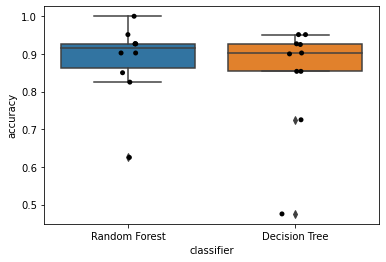

In [27]:
random_forest_classifier = grid_search.best_estimator_

rf_df = pd.DataFrame({'accuracy': cross_val_score(random_forest_classifier, features, perform, cv = 10),
                       'classifier': ['Random Forest'] * 10})
dt_df = pd.DataFrame({'accuracy': cross_val_score(decision_tree_classifier, features, perform, cv = 10),
                      'classifier': ['Decision Tree'] * 10})
both_df = rf_df.append(dt_df)

sb.boxplot(x = 'classifier', y = 'accuracy', data = both_df)
sb.stripplot(x = 'classifier', y = 'accuracy', data = both_df, jitter = True, color = 'black');

Les deux méthodes donnent des résultats assez satiffaisants. Cependant, le _**Random forest**_ semble donner des résultats légèrement meilleurs que ceux de l'_**arbre de classification**_. Toutefois, les résultats du _**Random forest**_ semblent un peu plus dispersés ; cela pourrait être expliqué par le nombre reduit de features nécessaires pour obtenir des résultats très intéressants avec le _**Random forest**_.

___________________________________________________________________
## **_3. REPRODUCTIBILITE DES DONNEES_**
___________________________________________________________________




[   6.   200.    88.  3060.    17.1   39. ]	-->	Performant	(Actual: Non performant)
[   4.  121.  110. 2660.   14.   47.]	-->	Non performant	(Actual: Performant)
[   4.  120.   97. 2489.   15.   46.]	-->	Non performant	(Actual: Performant)
[   4.   151.    93.  3035.    20.5   38. ]	-->	Performant	(Actual: Non performant)
[   4.   121.   115.  2671.    13.5   45. ]	-->	Non performant	(Actual: Performant)
[   4.   133.   115.  3090.    17.5   50. ]	-->	Non performant	(Actual: Performant)
[   4.   134.    95.  2515.    14.8   42. ]	-->	Performant	(Actual: Non performant)
[   4.   140.    88.  2890.    17.3   41. ]	-->	Performant	(Actual: Non performant)


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


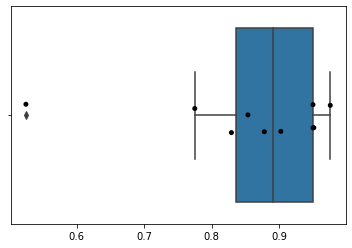

In [28]:
%matplotlib inline
import pandas as pd
import seaborn as sb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# We can jump directly to working with the clean data because we saved our cleaned data set
df_data_clean = pd.read_csv('df-data-clean.csv')

features = df_data_clean[['cylinders', 'engine', 'horsepower', 'weight', 'acceleration', 'year']].values

perform = df_data_clean['performance'].values

# This is the classifier that came out of Grid Search
random_forest_classifier = RandomForestClassifier(bootstrap = True, class_weight = None, criterion='gini',
                                max_depth = None, max_features = 5, max_leaf_nodes = None,
                                min_samples_leaf = 1, min_samples_split = 2,
                                min_weight_fraction_leaf = 0.0, n_estimators = 25, n_jobs = 1,
                                oob_score = False, random_state = None, verbose = 0, warm_start = True)

# All that's left to do now is plot the cross-validation scores
rf_classifier_scores = cross_val_score(random_forest_classifier, features, perform, cv = 10)
sb.boxplot(rf_classifier_scores)
sb.stripplot(rf_classifier_scores, jitter = True, color = 'black')

# ...and show some of the predictions from the classifier
(training_features,
 testing_features,
 training_perform,
 testing_perform) = train_test_split(features, perform, train_size = 0.75)


random_forest_classifier.fit(training_features, training_perform)

taille = 500 
for features, prediction, actual in zip(testing_features[:taille],random_forest_classifier.predict(testing_features[:taille]), testing_perform[:taille]):
    if prediction != actual:
        print('{}\t-->\t{}\t(Actual: {})'.format(features, prediction, actual))